# Textanalysis

In [3]:
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import requests
import nltk, nltk.sentiment, sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
name=nltk.corpus.names
nltk.download('stopwords')


nltk.download('vader_lexicon')
vader=nltk.sentiment.vader.SentimentIntensityAnalyzer()
from afinn import Afinn
afinn = Afinn()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cecil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cecil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# load the data

path2data='/Users/cecil/OneDrive/Dokumenter/sds2019_2/Group-31-SoDa/Data/movie_2.csv'
done=pd.read_csv(path2data)
text=done[['Female','d_Female','Summary','d_Drop']]
text.head(1)

,Female,d_Female,Summary,d_Drop
0,0.0,0.0,Two imprisoned men bond over a number of years...,0.0


In [6]:
from nltk.tokenize import RegexpTokenizer

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
def preprocessing(string):
    lower=string.lower()
    token=tokenizer.tokenize(lower)
    return token
text['Token']=text['Summary'].apply(preprocessing)

from nltk.probability import FreqDist
fdist = FreqDist(text['Token'][25])
print(fdist)
fdist.most_common(10)

<FreqDist with 26 samples and 30 outcomes>


[('the', 3),
 ('his', 2),
 ('to', 2),
 ('based', 1),
 ('on', 1),
 ('true', 1),
 ('story', 1),
 ('of', 1),
 ('jordan', 1),
 ('belfort', 1)]

### Male Text Analysis

In [7]:
import string
from nltk.corpus import stopwords
text_m=text[text.Female != 1].reset_index()
stop=stopwords.words('english')


stop1=stop+list(','+'a'+'.'+'"')
def remove_stop(x):
    removed_stop=[]
    for y in x:
        removed_stop.append(' '.join([word for word in y.split() if word not in stop1]))
    return removed_stop
no_stop_m=remove_stop(text_m['Summary'])

su_m=str()
for i in range(6184):
    su_m=su_m + str(no_stop_m[i])

su_m_1=preprocessing(su_m)

fdist = FreqDist(su_m_1)
print(fdist)
m = fdist.most_common(31)
m[3:] # exclude the first non-useful words

<FreqDist with 15516 samples and 104263 outcomes>


[('man', 694),
 ('young', 648),
 ('life', 633),
 ('new', 540),
 ('two', 505),
 ('in', 429),
 ('family', 419),
 ('one', 413),
 ('an', 395),
 ('world', 383),
 ('must', 369),
 ('find', 366),
 ('love', 320),
 ('when', 319),
 ('story', 312),
 ('woman', 288),
 ('finds', 274),
 ('father', 267),
 ('group', 263),
 ('he', 256),
 ('old', 255),
 ('see', 250),
 ('friends', 249),
 ('war', 247),
 ('after', 242),
 ('wife', 241),
 ('school', 239),
 ('full', 237)]

In [8]:
List = pd.Series(m[3:])
List.head()

0      (man, 694)
1    (young, 648)
2     (life, 633)
3      (new, 540)
4      (two, 505)
dtype: object

In [9]:
List = [list(i) for i in List]
List

[['man', 694],
 ['young', 648],
 ['life', 633],
 ['new', 540],
 ['two', 505],
 ['in', 429],
 ['family', 419],
 ['one', 413],
 ['an', 395],
 ['world', 383],
 ['must', 369],
 ['find', 366],
 ['love', 320],
 ['when', 319],
 ['story', 312],
 ['woman', 288],
 ['finds', 274],
 ['father', 267],
 ['group', 263],
 ['he', 256],
 ['old', 255],
 ['see', 250],
 ['friends', 249],
 ['war', 247],
 ['after', 242],
 ['wife', 241],
 ['school', 239],
 ['full', 237]]

In [10]:
# define a list of words that should not be in the result

stupid_words_m = ["new", "in", "an", "two", "one", "when", "two", "after", "see", "find", "he"]

for e in range(0,len(List)-len(stupid_words_m)):
    if List[e][0] in stupid_words_m:
        List.remove(List[e])
    else:
        pass

In [11]:
# getting top 20
List

[['man', 694],
 ['young', 648],
 ['life', 633],
 ['two', 505],
 ['family', 419],
 ['an', 395],
 ['world', 383],
 ['must', 369],
 ['love', 320],
 ['story', 312],
 ['woman', 288],
 ['finds', 274],
 ['father', 267],
 ['group', 263],
 ['old', 255],
 ['friends', 249],
 ['war', 247],
 ['after', 242],
 ['wife', 241],
 ['school', 239],
 ['full', 237]]

### Female Text Analysis

In [12]:
text_f=text[text.Female == 1].reset_index()
def remove_stop(x):
    removed_stop=[]
    for y in x:
        removed_stop.append(' '.join([word for word in y.split() if word not in stop]))
    return removed_stop
no_stop_f=remove_stop(text_f['Summary'])

su_f=str()
for i in range(1000):
    su_f=su_f + str(no_stop_f[i])

su_f_1=preprocessing(su_f)

fdist = FreqDist(su_f_1)
print(fdist)
f = fdist.most_common(30)
f[2:] # exclude the first non-useful words

<FreqDist with 5516 samples and 16661 outcomes>


[('woman', 168),
 ('young', 155),
 ('life', 122),
 ('new', 108),
 ('the', 98),
 ('girl', 90),
 ('two', 77),
 ('love', 77),
 ('one', 77),
 ('family', 69),
 ('school', 65),
 ('in', 64),
 ('finds', 62),
 ('world', 61),
 ('man', 59),
 ('mother', 59),
 ('must', 57),
 ('after', 55),
 ('an', 55),
 ('group', 54),
 ('when', 47),
 ('home', 47),
 ('town', 44),
 ('friends', 43),
 ('husband', 43),
 ('story', 43),
 ('three', 42),
 ('city', 42)]

In [13]:
Listf = pd.Series(f[2:])
Listf.head()

0    (woman, 168)
1    (young, 155)
2     (life, 122)
3      (new, 108)
4       (the, 98)
dtype: object

In [14]:
Listf = [list(i) for i in Listf]
Listf

[['woman', 168],
 ['young', 155],
 ['life', 122],
 ['new', 108],
 ['the', 98],
 ['girl', 90],
 ['two', 77],
 ['love', 77],
 ['one', 77],
 ['family', 69],
 ['school', 65],
 ['in', 64],
 ['finds', 62],
 ['world', 61],
 ['man', 59],
 ['mother', 59],
 ['must', 57],
 ['after', 55],
 ['an', 55],
 ['group', 54],
 ['when', 47],
 ['home', 47],
 ['town', 44],
 ['friends', 43],
 ['husband', 43],
 ['story', 43],
 ['three', 42],
 ['city', 42]]

In [20]:
# define a list of words that should not be in the result
stupid_words_f = ["the", "two", "one", "in", "after", "an", "when", "three", "new"]

for e in range(0,len(Listf)-len(stupid_words_f)):
    if Listf[e][0] in stupid_words_f:
        #print(Listf[e])
        Listf.remove(Listf[e])
    else:
        pass

In [21]:
Listf

[['woman', 168],
 ['young', 155],
 ['life', 122],
 ['girl', 90],
 ['love', 77],
 ['family', 69],
 ['school', 65],
 ['finds', 62],
 ['world', 61],
 ['man', 59],
 ['mother', 59],
 ['must', 57],
 ['group', 54],
 ['home', 47],
 ['town', 44],
 ['friends', 43],
 ['husband', 43],
 ['story', 43],
 ['three', 42],
 ['city', 42]]

### Wordcloud Male

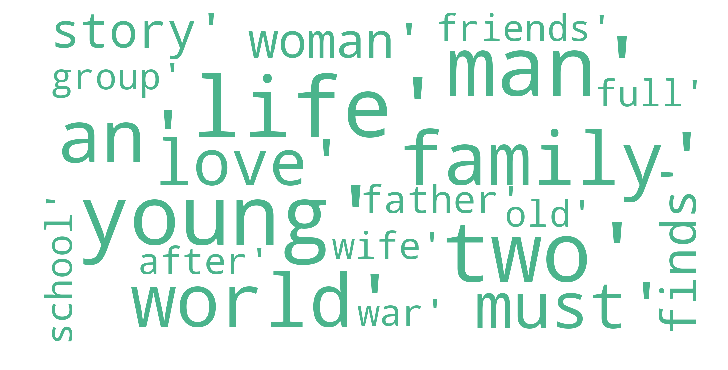

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(157,41%%, %d%%)" % np.random.randint(50,51))


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=50,
        min_font_size=5, 
        scale=5,
        random_state=1
    ).generate(str(data))
    wordcloud.recolor(color_func = grey_color_func)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(List) # wordcloud male

### Wordcloud Female

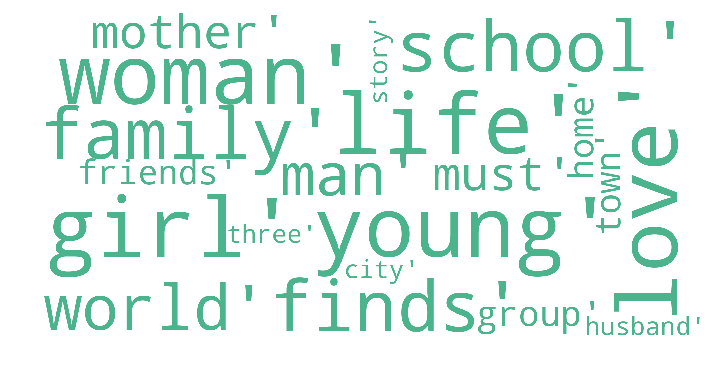

In [23]:
show_wordcloud(Listf) # wordcloud female